In [1]:
import numpy as np
import scipy as sp
import cvxopt
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
#Niño Paul Batanay
#Assignment: Code logreg and svm
#Jul 12, 2017

## Logistic Regression and SVM

### Problem 1:
Create a synthetic dataset in $R^2$ that is linearly separable

In [3]:
#Create two Gaussian distributions centered at different means.
mu1 = np.array([0,1])
cov1 = np.array([[1,0],
                [0,1]])
mu2 = np.array([9,1])
cov2 = np.array([[2,-0.5],
                 [-1,1]])

gaussian1 = np.random.multivariate_normal(mu1, cov1, size=1000)
gaussian2 = np.random.multivariate_normal(mu2, cov2, size=1000)

x = np.vstack((gaussian1, gaussian2))
#add ones
x = np.hstack((x, np.ones((2000,1))))
y = np.hstack((np.zeros(len(gaussian1)), np.ones(len(gaussian2)))).astype(int)
theta0 = np.array([2,1,3])

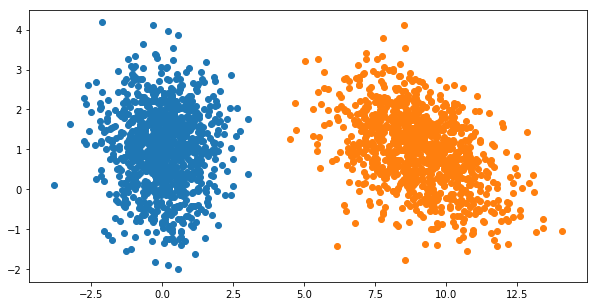

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(gaussian1[:,0], gaussian1[:,1], "o")
plt.plot(gaussian2[:,0], gaussian2[:,1], "o")
plt.show()

### Problem 2:

Try logitic regression with and without regularization

In [5]:
#create intermediate functions
sig = lambda x,theta: 1/(1. + np.exp(-np.dot(x,theta)))
def cost(theta, x, y, reg=None):
    e_score = np.exp(-np.dot(x,theta))
    if reg:
        reg_term = reg*np.linalg.norm(theta**2)
    else:
        reg_term = 0
    #cost is the expanded form of the loglikelihood
    cost = np.mean(y*np.log(1+e_score)-(1-y)*(np.log(e_score) - np.log(1+e_score))) + reg_term
    return cost 

def plot_logreg(weights):
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(gaussian1[:,0], gaussian1[:,1], "o")
    ax.plot(gaussian2[:,0], gaussian2[:,1], "o")
    
    xx, yy = np.mgrid[-4:14:.01, -4:6:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid = np.append(grid, np.ones((len(grid),1)), axis=1)
    probs = sig(grid, weights).reshape(xx.shape)
    
    contour = ax.contourf(xx, yy, probs, 25, cmap="YlGnBu",
                      vmin=0, vmax=1)
    ax_c = fig.colorbar(contour)
    plt.show()

### Without Regularization

In [6]:
#without regularization and using "BFGS" method
wout_reg = minimize(cost, theta0, args=(x,y,0), method="BFGS")
wout_reg

      fun: 4.260212849432086e-06
 hess_inv: array([[  170181.81182543,   100588.60968452,  -734454.95027264],
       [  100588.60968452,    59457.99743726,  -434110.46785882],
       [ -734454.95027264,  -434110.46785882,  3169713.40402479]])
      jac: array([  8.09603853e-06,   4.69378062e-06,   3.05918070e-06])
  message: 'Optimization terminated successfully.'
     nfev: 125
      nit: 23
     njev: 25
   status: 0
  success: True
        x: array([  8.61910227,   1.06740444, -33.03776422])

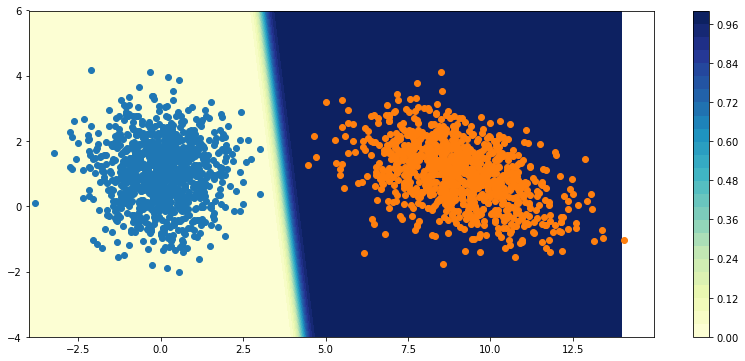

In [7]:
plot_logreg(wout_reg.x)

In [8]:
#without regularization and using "CG" method
wout_reg = minimize(cost, theta0, args=(x,y,0), method="CG")
wout_reg

     fun: 2.6151509667605345e-05
     jac: array([  6.84250199e-06,   5.77202036e-06,   7.74075625e-06])
 message: 'Optimization terminated successfully.'
    nfev: 440
     nit: 18
    njev: 88
  status: 0
 success: True
       x: array([  6.00524755,   0.09902934, -22.55520039])

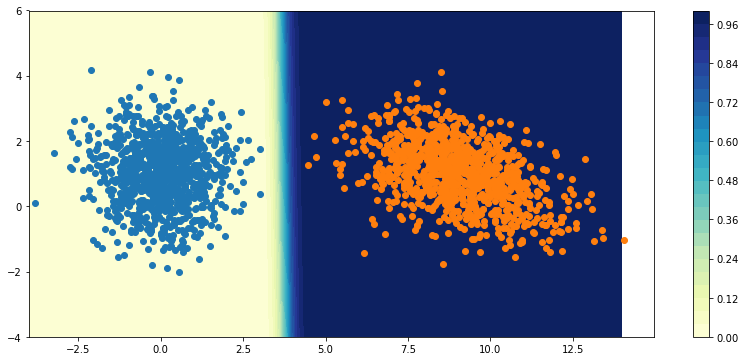

In [9]:
plot_logreg(wout_reg.x)

### With Regularization

In [10]:
#with regularization, using "BFGS"
with_reg = minimize(cost, theta0, args=(x,y,0.01), method="BFGS")
with_reg

      fun: 0.10339764307100369
 hess_inv: array([[  5.5917434 ,  -5.32047567,  -2.87205483],
       [ -5.32047567,  20.59999754,  -2.35894839],
       [ -2.87205483,  -2.35894839,  15.40076584]])
      jac: array([ -1.53481960e-06,  -1.18836761e-06,  -5.87664545e-06])
  message: 'Optimization terminated successfully.'
     nfev: 85
      nit: 15
     njev: 17
   status: 0
  success: True
        x: array([ 1.00095992, -0.85173387, -2.08293969])

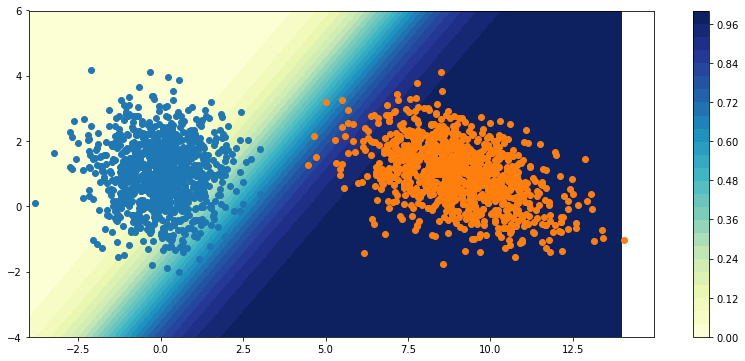

In [11]:
plot_logreg(with_reg.x)

In [12]:
#with regularization, using "BFGS"
with_reg = minimize(cost, theta0, args=(x,y,0.01), method="CG")
with_reg

     fun: 0.10339764277363707
     jac: array([ -4.31202352e-07,   9.64850187e-07,   2.93366611e-07])
 message: 'Optimization terminated successfully.'
    nfev: 150
     nit: 12
    njev: 30
  status: 0
 success: True
       x: array([ 1.00093382, -0.85170976, -2.08282493])

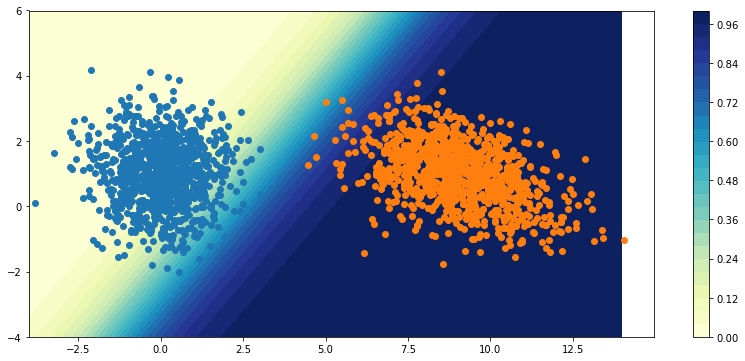

In [13]:
plot_logreg(with_reg.x)

With regularization the two methods on optimization(BFGS and CG) are just the same wrt the convergence of the optimal value for theta. However, they have different decision boundaries when there is no regularization.

### Problem 3:

Try support vector machine.

In [14]:
x = np.vstack((gaussian1, gaussian2))
y = y = np.hstack((np.ones(len(gaussian1))*-1, np.ones(len(gaussian2)))).astype(int)

def svm(x, y):
    K = np.zeros(shape = (len(x), len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            K[i,j] = np.dot(x[i], x[j])

    P = cvxopt.matrix(np.outer(y, y)*K)
    q = cvxopt.matrix(np.ones(len(x))*-1)
    G = cvxopt.matrix(np.vstack([np.eye(len(x))*-1,
                                 np.eye(len(x))]))
    h = cvxopt.matrix(np.hstack([np.zeros(len(x)), 
                                 np.ones(len(x))*999999999.0])) 
    A = cvxopt.matrix(y.astype(float), (1,len(x)))
    b = cvxopt.matrix(0.0)

    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
    a = np.ravel(solution['x'])
    
    #find the support vectors
    ssv = a > 1e-5 #indices of the support vectors are non zeros
    ind = np.arange(len(a))[ssv]
    a = a[ssv]
    sv = x[ssv]
    sv_y = y[ssv]
    
    #calculate weight and bias
    w = np.zeros(x.shape[1])
    for n in range(len(a)):
        w += a[n]*sv_y[n]*sv[n]

    b = 0
    for n in range(len(a)):
        b += sv_y[n]
        b -= np.sum(a * sv_y * K[ind[n],ssv])
    b /= len(a)
    return w, b

In [15]:
w, b = svm(x, y)

     pcost       dcost       gap    pres   dres
 0:  2.3873e+16 -9.0308e+20  2e+21  6e-01  4e-04
 1:  5.2473e+16 -1.4370e+20  2e+20  4e-02  2e+01
 2:  6.0720e+16 -2.2156e+19  3e+19  5e-03  3e+00
 3:  6.3549e+16 -2.2348e+18  3e+18  4e-04  2e-01
 4:  4.0576e+16 -6.4511e+16  1e+17  4e-06  2e-03
 5:  6.2764e+15 -6.7201e+15  1e+16  5e-08  3e-06
 6:  9.0004e+14 -9.9175e+14  2e+15  8e-09  1e-06
 7:  1.2897e+14 -1.4171e+14  3e+14  4e-10  4e-07
 8:  1.8481e+13 -2.0311e+13  4e+13  4e-09  1e-07
 9:  2.6483e+12 -2.9105e+12  6e+12  1e-09  6e-08
10:  3.7949e+11 -4.1706e+11  8e+11  5e-11  2e-08
11:  5.4380e+10 -5.9764e+10  1e+11  4e-11  8e-09
12:  7.7926e+09 -8.5640e+09  2e+10  2e-11  3e-09
13:  1.1167e+09 -1.2272e+09  2e+09  8e-13  1e-09
14:  1.6001e+08 -1.7586e+08  3e+08  6e-12  5e-10
15:  2.2929e+07 -2.5201e+07  5e+07  3e-12  2e-10
16:  3.2854e+06 -3.6114e+06  7e+06  1e-12  6e-11
17:  4.7071e+05 -5.1759e+05  1e+06  1e-13  2e-11
18:  6.7420e+04 -7.4200e+04  1e+05  3e-13  9e-12
19:  9.6494e+03 -1.06

In [16]:
def plot_svm(weights, b):
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(gaussian1[:,0], gaussian1[:,1], "o")
    ax.plot(gaussian2[:,0], gaussian2[:,1], "o")
    
    xx, yy = np.mgrid[-4:14:.01, -4:6:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    scores = (np.dot(grid, weights) + b).reshape(xx.shape)
    
    contour = ax.contourf(xx, yy, scores, 25, cmap="YlGnBu",
                      vmin=0, vmax=1)
    ax_c = fig.colorbar(contour)
    plt.show()

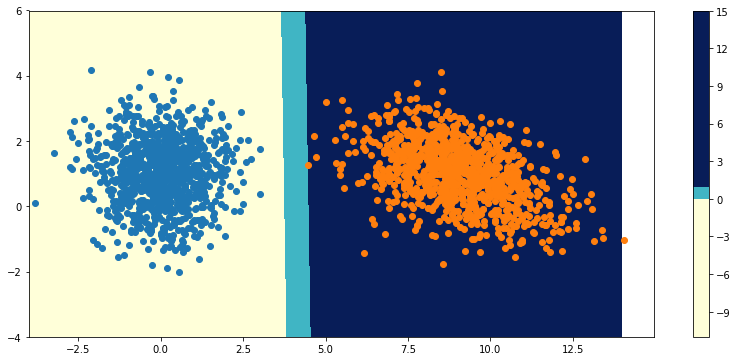

In [17]:
plot_svm(w, b)

For SVM, the margin is very visible in the boundary decision.